# **Exploratory Data Analysis**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

import scipy.stats as st
from sklearn import preprocessing as pre

In [2]:
# Constants
RANDOM_STATE = 42

## **2) Univariate and Multivariate Analysis**
---

### Motivation:

Our primary objective with this exploratory analysis is to identify the features in our data that best represent our understanding of the [root causes of flight delays](../Research/flight_delay_reasons.md) and in so doing, provide the basis for the **accurate** and **reliable** prediction of commercial flight delays. We aim to develop a sense for how well our feature space captures common flight delay reasons in order to determine which features to select, which additional data to gather, and which features should be re-engineered or excluded.

#### [Suggested Considerations](https://github.com/lighthouse-labs/mid-term-project-I/blob/master/exploratory_analysis.ipynb):

1) Test the hypothesis that the arrival delay is from Normal distribution and that mean of the delay is 0. Be careful about the outliers.
2) Is average/median monthly delay different during the year? If so, which months have the biggest delays and what could be the reason?
3) Does the weather affect the delay?
4) How are taxi times changing during the day? Does higher traffic lead to longer taxi times?
5) What is the average percentage of delays that exist prior to departure (*i.e.* are arrival delays caused by departure delays)? Are airlines able to lower the delay during the flights?
6) How many states cover 50% of US air traffic?
7) Test the hypothesis that planes fly faster when there is a departure delay.
8) When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?
9) Find the top 10 the bussiest airports. Does the greatest number of flights mean that the majority of passengers went through a given airport? How much traffic do these 10 airports cover?
10) Do bigger delays lead to bigger fuel consumption per passenger?

### 1) Is the arrival delay normally distributed?

#### `arr_delay` distribution

In [3]:
flights = pd.read_csv('../Data/files/flights_no_missing.csv')
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

In [4]:
flights['arr_delay'].describe()

count    2.339962e+06
mean     5.466329e+00
std      4.992268e+01
min     -1.290000e+03
25%     -1.500000e+01
50%     -6.000000e+00
75%      8.000000e+00
max      2.692000e+03
Name: arr_delay, dtype: float64

<AxesSubplot:xlabel='arr_delay'>

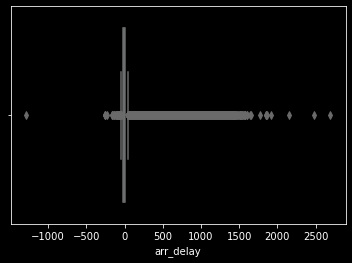

In [5]:
sns.boxplot(x=flights['arr_delay'])

In [6]:
st.normaltest(flights['arr_delay'])

NormaltestResult(statistic=3414284.7469730703, pvalue=0.0)

In [7]:
flights['arr_delay'].shape[0]

2339962

By default we have strong evidence to reject the null hypothesis, but this is largely due to the much larger area of the right tail of the distribution relative to the left tail which the boxplot emphasizes. Let us attempt a robust [quantile transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html) to see if we can better normalize the data. [Google](https://developers.google.com/machine-learning/clustering/prepare-data) suggests using ~10x fewer quantiles than the number of observations, so we will attempt that. (Note that this is not a requirement. [Jason Brownlee](https://machinelearningmastery.com/quantile-transforms-for-machine-learning/) found reasonable success using ~2x fewer quantiles than observations, but that was with a much smaller dataset and the number of rows we have here is so large that we should avoid too high of a subsample to prevent the operation from becoming prohibitively computationally expensive.)

In [8]:
quantile_transformer = pre.QuantileTransformer(n_quantiles=250000, subsample=250000, output_distribution='normal', random_state=RANDOM_STATE)

In [9]:
norm_delay = quantile_transformer.fit_transform(flights['arr_delay'].to_numpy().reshape(-1, 1))

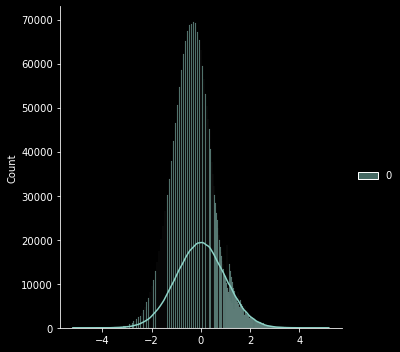

In [10]:
sns.displot(norm_delay, kde=True)

In [11]:
st.normaltest(norm_delay)

NormaltestResult(statistic=array([16.40402169]), pvalue=array([0.0002741]))